In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Data Split
from sklearn.model_selection import train_test_split

#Models
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Tree Visualizer
from sklearn.tree import plot_tree

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [3]:
all_data = pd.read_csv("./Demographic_Data.csv")   #having the csv file in the same folder as this .py file
all_data.head()  
#age_disc = pd.qcut(all_data['age'], q=5,labels=[0,1,2,3,4])
#age_disc.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
pd.qcut(all_data['age'], q=5, precision=0)

0        (31.0, 40.0]
1        (31.0, 40.0]
2        (40.0, 49.0]
3        (40.0, 49.0]
4        (31.0, 40.0]
             ...     
79995    (60.0, 85.0]
79996    (49.0, 60.0]
79997    (49.0, 60.0]
79998    (40.0, 49.0]
79999    (17.0, 31.0]
Name: age, Length: 80000, dtype: category
Categories (5, interval[float64]): [(17.0, 31.0] < (31.0, 40.0] < (40.0, 49.0] < (49.0, 60.0] < (60.0, 85.0]]

In [5]:
X = all_data[['age','items','amount','region']]
y = all_data['in-store']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

#Data is now ready for the machine learing model

In [6]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc_model = dtc.fit(X_train, y_train)

rfc = RandomForestClassifier(n_estimators=500, n_jobs=2, random_state=0)   #.values gives the values in an array of shape (n,1)
rfc_model = rfc.fit(X_train, y_train.values.ravel())     #.ravel() converts array to shape (n,)

In [7]:
#Predictions

dtc_pred = dtc_model.predict(X_test)
rfc_pred = rfc_model.predict(X_test)

In [8]:
print(classification_report(y_test, dtc_pred))    #Reports

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      7935
           1       0.79      1.00      0.88      8065

    accuracy                           0.87     16000
   macro avg       0.90      0.87      0.87     16000
weighted avg       0.90      0.87      0.87     16000



In [9]:
print("Accuracy = ", metrics.accuracy_score(y_test, dtc_pred))

feature_list = list(X.columns)
feature_imp = pd.Series(dtc_model.feature_importances_, index=feature_list).sort_values(ascending=False)
feature_imp

Accuracy =  0.868875


region    0.776311
amount    0.223669
items     0.000020
age       0.000000
dtype: float64

In [10]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm1 = confusion_matrix(y_test, dtc_pred)

In [11]:
print(classification_report(y_test, rfc_pred))    #Reports

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7935
           1       0.84      0.90      0.87      8065

    accuracy                           0.86     16000
   macro avg       0.87      0.86      0.86     16000
weighted avg       0.87      0.86      0.86     16000



In [12]:
print("Accuracy = ", metrics.accuracy_score(y_test, rfc_pred))

feature_list = list(X.columns)
feature_imp = pd.Series(rfc_model.feature_importances_, index=feature_list).sort_values(ascending=False)
feature_imp

Accuracy =  0.86475


region    0.476081
amount    0.381042
age       0.122069
items     0.020808
dtype: float64

In [13]:
cm2 =confusion_matrix(y_test, rfc_pred)

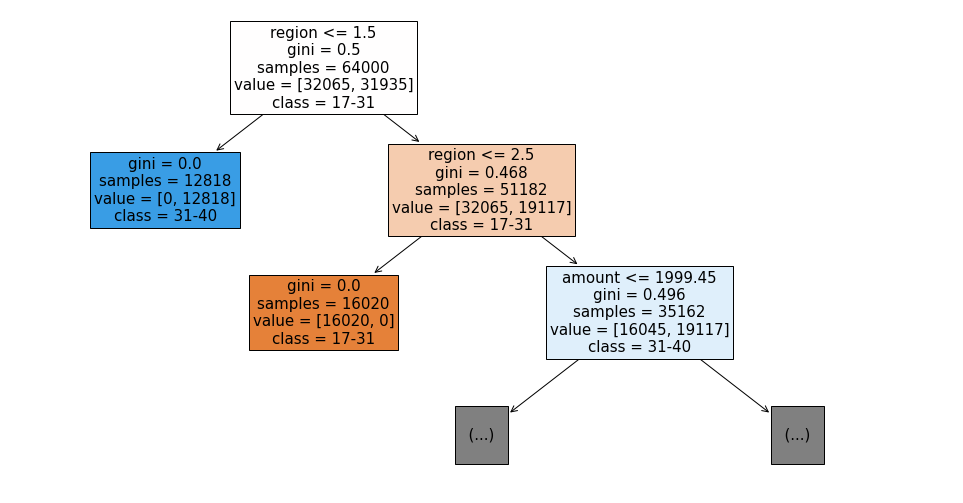

In [14]:
#plotting Decision Tree Model

fig = plt.figure(figsize=(17,9))
tree = plot_tree(dtc_model, feature_names=X.columns, class_names=['17-31','31-40','40-49','49-60','60-85'], filled=True, max_depth=2, fontsize='15')

In [15]:
#fig = plt.figure(figsize=(25,20))
#tree = plot_tree(rfc_model, feature_names=X.columns, class_names=['North', 'South', 'East', 'West'], filled=True, max_depth=2, fontsize='18')
from sklearn import tree
len(rfc_model.estimators_)  #how many decision trees has random forest generated


500

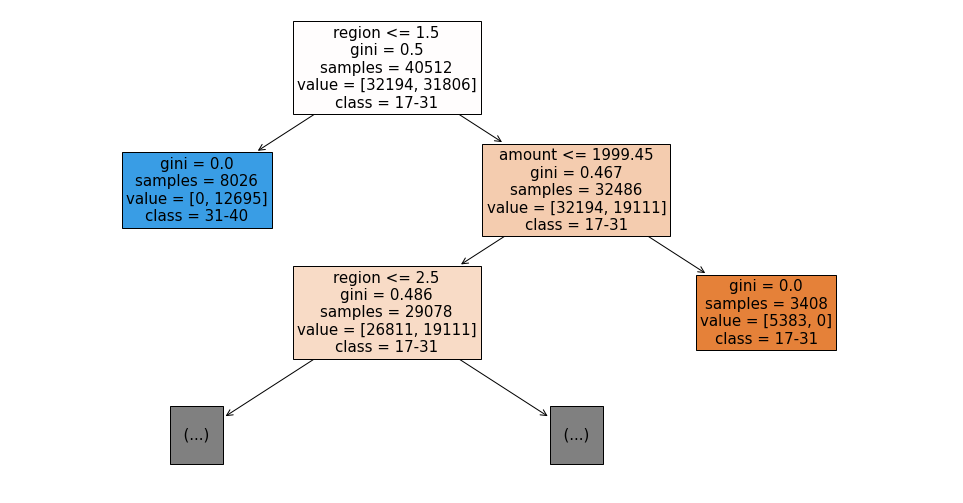

In [16]:
#Plotting the first Decision Tree made by Random Forest

plt.figure(figsize=(17,9))
tree = plot_tree(rfc_model.estimators_[0],filled=True, feature_names=X.columns, max_depth=2, fontsize='15',class_names=['17-31','31-40','40-49','49-60','60-85'])

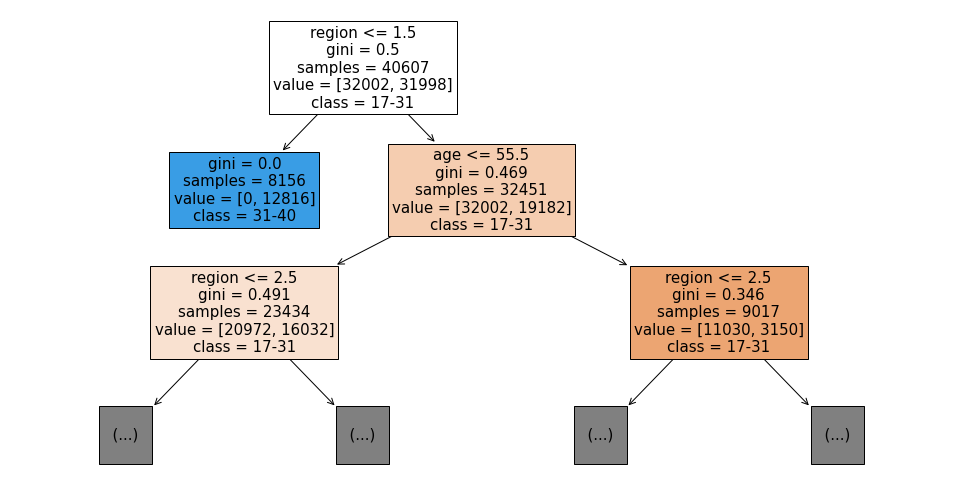

In [17]:
#Plotting the 50th Decision Tree made by Random Forest

from sklearn import tree
plt.figure(figsize=(17,9))
tree = plot_tree(rfc_model.estimators_[49],filled=True,max_depth= 2, feature_names=X.columns, fontsize='15',class_names=['17-31','31-40','40-49','49-60','60-85'])

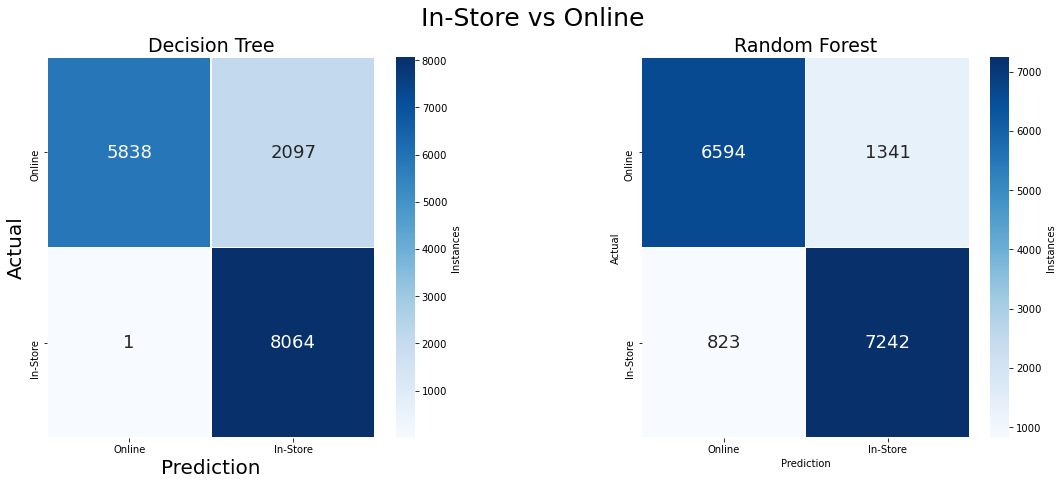

In [30]:
#age independent variable, age discritze, build many models

df_cm1 = pd.DataFrame(cm1, range(2), range(2))
df_cm2 = pd.DataFrame(cm2, range(2), range(2))

In_Store=['Online','In-Store']

fig = plt.figure(figsize = (18,7)) # width x height
ax1 = fig.add_subplot(1, 2, 1) # row, column, position
ax2 = fig.add_subplot(1, 2, 2)
fig.subplots_adjust(hspace=0.45,wspace=0.45)


sns.heatmap(df_cm1, ax=ax1, xticklabels=In_Store, yticklabels=In_Store, annot=True,fmt="d", annot_kws={"size": 18},cmap="Blues",linewidths=.5,cbar_kws={'label': 'Instances'}) # font size
sns.heatmap(df_cm2, ax=ax2, xticklabels=In_Store, yticklabels=In_Store, annot=True,fmt="d", annot_kws={"size": 18},cmap="Blues",linewidths=.5,cbar_kws={'label': 'Instances'}) # font size


ax1.set_xlabel('Predicted',fontsize=20)
ax1.set_ylabel('Actual',fontsize=20)
plt.suptitle('In-Store vs Online',fontsize=25)

ax1.set(xlabel='Prediction', ylabel='Actual')
ax1.set_title('Decision Tree', y=2, fontsize=19)
ax2.set(xlabel='Prediction', ylabel='Actual')
ax2.set_title('Random Forest', y=2, fontsize=19)


plt.show()
